In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('train.csv')

# EDA

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
468,469,0,3,"Scanlan, Mr. James",male,NaN,0,0,36209,7.725,NaN,Q
379,380,0,3,"Gustafsson, Mr. Karl Gideon",male,19.0,0,0,347069,7.775,NaN,S
190,191,1,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.000,NaN,S
417,418,1,2,"Silven, Miss. Lyyli Karoliina",female,18.0,0,2,250652,13.000,NaN,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.500,B79,S


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df.corr(numeric_only=True)['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [17]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


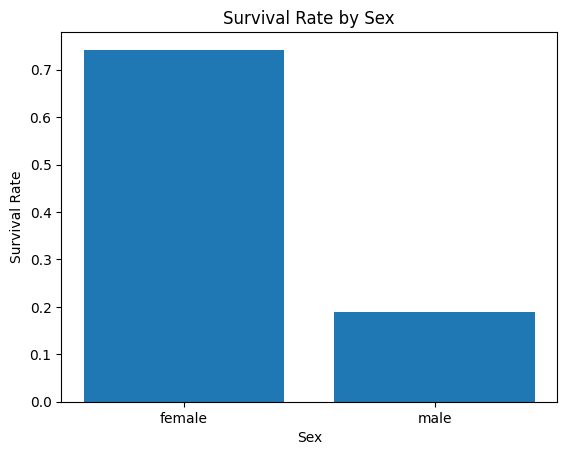

In [47]:
survival_by_sex = df.groupby('Sex')['Survived'].mean()

plt.bar(survival_by_sex.index, survival_by_sex.values)
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex')
plt.show()


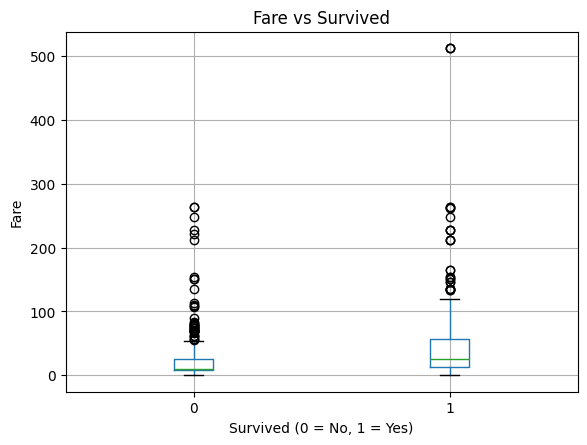

In [33]:
df.boxplot(column='Fare', by='Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.title('Fare vs Survived')
plt.suptitle('')   # remove extra title
plt.show()


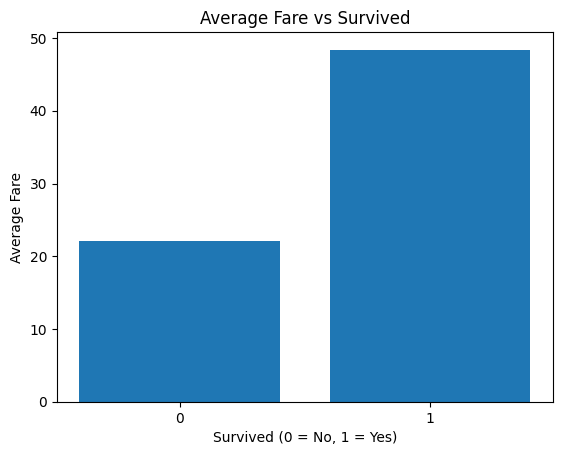

In [46]:
import matplotlib.pyplot as plt

fare_by_survival = df.groupby('Survived')['Fare'].mean()

plt.bar(fare_by_survival.index,fare_by_survival.values)
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Average Fare')
plt.title('Average Fare vs Survived')

plt.xticks([0, 1])

plt.show()



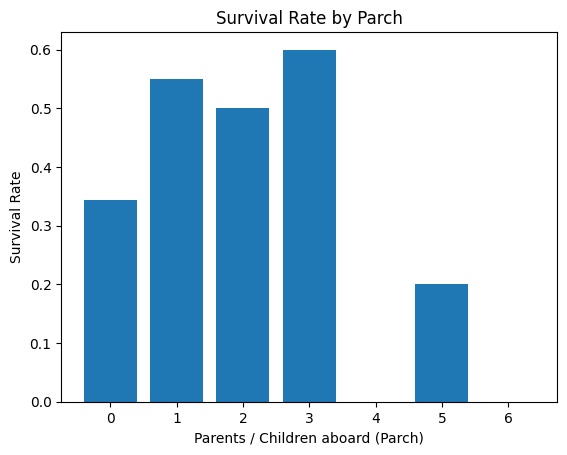

In [43]:
import matplotlib.pyplot as plt

survival_by_parch = df.groupby('Parch')['Survived'].mean()

plt.bar(survival_by_parch.index, survival_by_parch.values)
plt.xlabel('Parents / Children aboard (Parch)')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Parch')
plt.show()



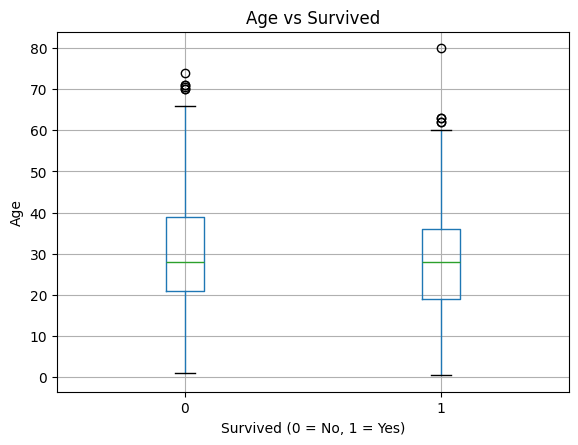

In [52]:
import matplotlib.pyplot as plt

df.boxplot(column='Age', by='Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.title('Age vs Survived')
plt.suptitle('')
plt.show()


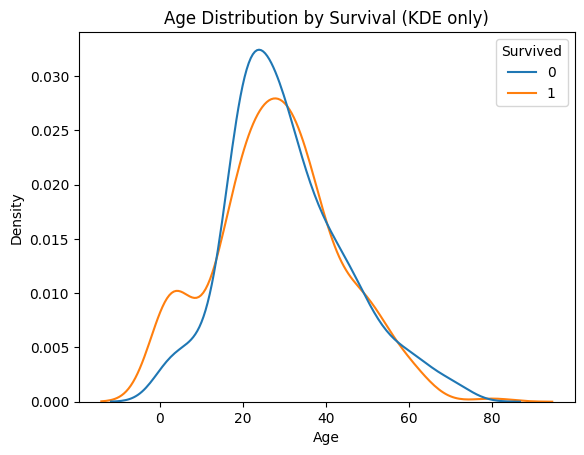

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(
    data=df,
    x='Age',
    hue='Survived',
    common_norm=False
)

plt.xlabel('Age')
plt.title('Age Distribution by Survival (KDE only)')
plt.show()


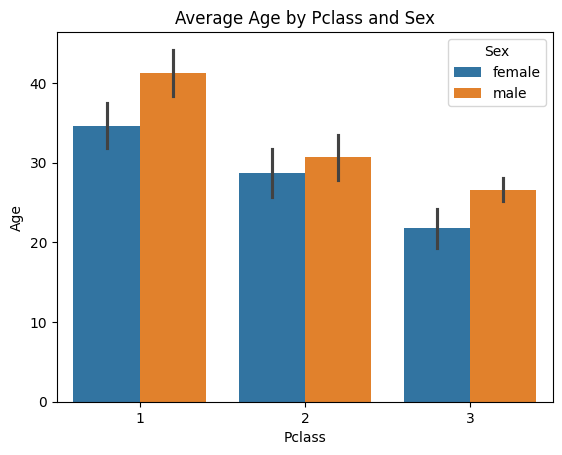

In [60]:
sns.barplot(
    x='Pclass',
    y='Age',
    hue='Sex',
    data=df
)

plt.title('Average Age by Pclass and Sex')
plt.show()